In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# data example = canada imigration data
df_can = pd.read_excel("./Canada.xlsx", sheet_name="Canada by Citizenship", skiprows=range(20))
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [2]:
df_can.shape

(197, 43)

In [3]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1,
           inplace=True)
df_can.rename(columns={'OdName':'Country',
                      'AreaName': 'Continent',
                      'RegName':'Region'}, inplace=True)

In [6]:
df_can2=df_can.set_index(['Country'])
df_can2["Total"] = df_can2.sum(axis=1)
years=range(1980,2014)
df_dsn=df_can2.loc[['Denmark','Sweden','Norway'],years]
df_dsn["Total"] = df_dsn.sum(axis=1)
df_dsn.head(3)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,62,101,97,108,81,92,93,94,81,3901
Sweden,281,308,222,176,128,158,187,198,171,182,...,205,139,193,165,167,159,134,140,140,5866
Norway,116,77,106,51,31,54,56,80,73,76,...,57,53,73,66,75,46,49,53,59,2327


In [17]:
total_for_dsn = sum(df_dsn["Total"])


In [21]:
country_proporsion = [(float(value)/ total_for_dsn) for value in df_dsn["Total"]]
for idx, porsion in enumerate(country_proporsion):
    print(df_dsn.index.values[idx], porsion )


Denmark 0.32255663965602777
Sweden 0.48503390110798744
Norway 0.1924094592359848


In [19]:
total_for_dsn

12094

country_porsion = []
for value in df_dsn["Total"] :
    porsion = value/ total_for_dsn
    country_porsion.append(porsion)

In [22]:
# 50 * 10
width, height = (50, 10)

In [26]:
total_tiles = width * height
total_tiles

500

In [27]:
tiles_per_country = [round(propor * total_tiles) for propor in country_proporsion] 

In [28]:
tiles_per_country

[161, 243, 96]

In [35]:
tiles_per_country

[161, 243, 96]

In [36]:
kuadrat_nilai = [(n ** 2) for n in nilai]
kuadrat_nilai

[4, 9, 16, 25, 36]

In [77]:
tile_index  = 0
country_index = 0
waffle_chart = np.zeros((width,height))
for col in range(width):
    for row in range(height):
        tile_index +=1
        if tile_index > sum(tiles_per_country[0: country_index]):
            country_index+=1
        waffle_chart[col, height - (row +1) ] = country_index
        
        
        
# waffle_chart

<Figure size 432x288 with 0 Axes>

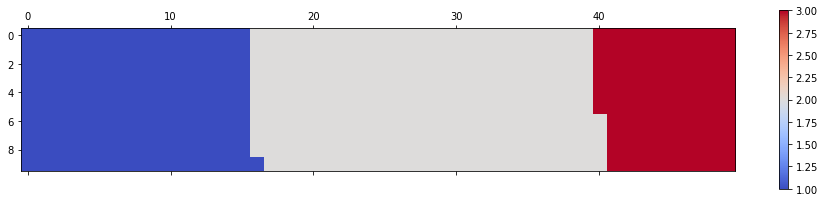

In [78]:
fig = plt.figure()
colormap = plt.cm.coolwarm
waffle_chart = waffle_chart.transpose()
plt.matshow(waffle_chart, cmap = colormap)
plt.colorbar()

In [69]:
mac = 6
myList = []

for i in range(0,6) :
    myList.append(mac-(i+ 1))
    
myList

[5, 4, 3, 2, 1, 0]

<Figure size 432x288 with 0 Axes>

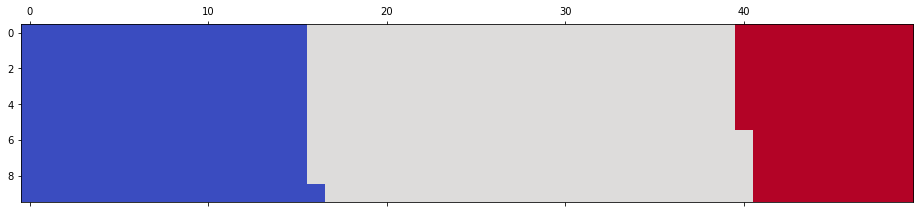

In [81]:
fig= plt.figure()
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap= colormap)
ax = plt.gca()

([], <a list of 0 Text yticklabel objects>)

<Figure size 432x288 with 0 Axes>

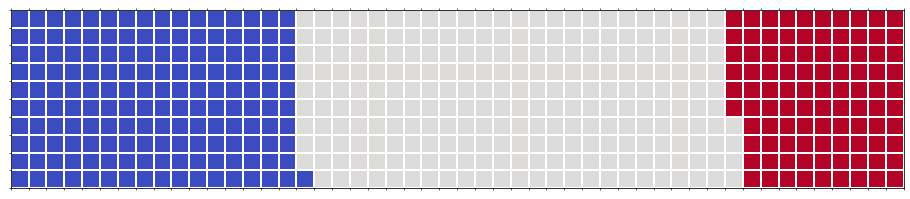

In [84]:
fig= plt.figure()
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap= colormap)
ax = plt.gca()
ax.set_xticks(np.arange(-.5, width, 1), minor=True)
ax.set_yticks(np.arange(-.5, height, 1), minor=True)
ax.grid(which="minor",color="w", linestyle = "-", linewidth=2)
plt.xticks([])
plt.yticks([])

word cloud

In [95]:
from wordcloud import WordCloud, STOPWORDS


In [87]:
alice_text = open("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt")

FileNotFoundError: [Errno 2] No such file or directory: 'https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt'

In [93]:
import requests
url = 'https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt'
r = requests.get(url, allow_redirects=True)
open('alice.txt', 'wb').write(r.content)


145192

In [107]:
alice_novel = open('./alice.txt', 'r').read()
stop_words = set(STOPWORDS)

alice_word_count_generator = WordCloud(
    background_color= "white",
    max_words= 1000,
    stopwords= stop_words
)



alice_word_count_generator.generate(alice_novel)
alice_word_count_generator

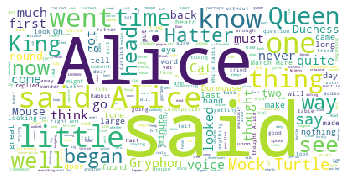

In [109]:
alice_word_count_generator
plt.imshow(alice_word_count_generator);
plt.axis("off")
plt.show()

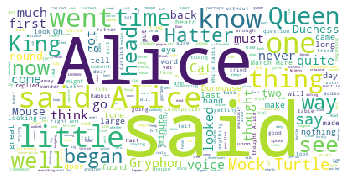

## seaborn


In [111]:
data_years =df_can2[years]
data_years

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,80,67,71,69,63,44,69,132,242,434,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yemen,1,2,1,6,0,18,7,12,7,18,...,124,161,140,122,133,128,211,160,174,217
Zambia,11,17,11,7,16,9,15,23,44,68,...,56,91,77,71,64,60,102,69,46,59
Zimbabwe,72,114,102,44,32,29,43,68,99,187,...,1450,615,454,663,611,508,494,434,437,407


In [122]:
df_total_year = pd.DataFrame(data_years.sum(axis = 0))
df_total_year

,0
1980,286274
1981,257282
1982,242350
1983,178370
1984,176544
1985,168692
1986,198702
1987,304150
1988,323170
1989,383100


In [117]:
import seaborn as sns

In [126]:
df_total_year.index = map(float, df_total_year.index)

df_total_year.reset_index(inplace=True)

In [129]:
df_total_year.columns =["years", "total"]

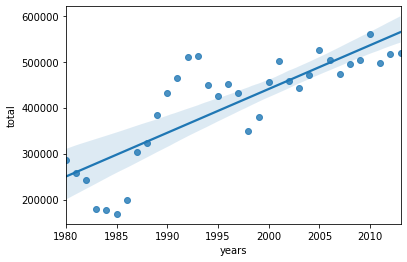

In [130]:
ax = sns.regplot(x="years", y="total", data = df_total_year)

# map

In [137]:
data = [1,2,3,4,5,6,7,8]

# map(function, list)

def quadrat(val):
    return val ** 2

dataQuadrad = map(quadrat, data)
list(dataQuadrad)

[1, 4, 9, 16, 25, 36, 49, 64]